# Ejemplo de data Augmentation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model

print(tf.__version__)


2024-03-12 01:07:43.616117: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.13.0


In [2]:
# definimos la función para visualizar la historia

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.plot(hist['epoch'], hist['loss'],'r--',
           label='Training Error')
  # plt.plot(hist['epoch'], hist['val_loss'],'b',
  #          label = 'Validation Error')
  # plt.ylim([0,20])
  plt.legend()
  plt.show()

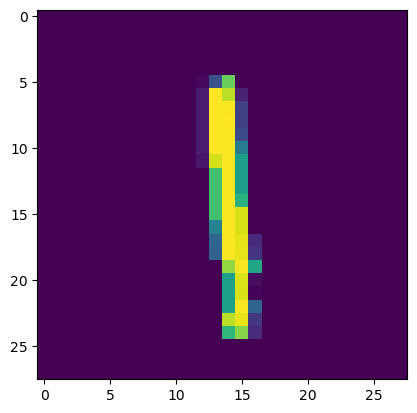

In [3]:
# Importamos datos y visualizamos una imagen
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# visualizamos la imagen 8
plt.imshow(x_train[8])
plt.show()

In [4]:
print(x_train.ndim)
print(x_train.shape)
print(y_train.ndim)
print(y_train.shape)

3
(60000, 28, 28)
1
(60000,)


In [5]:
# guardamos las dimensiones en variables para hacer la red mas generica
# y reutilizable

ntrain = x_train.shape[0]
ntest  = x_test.shape[0]
dimf = x_train.shape[1]
dimc = x_train.shape[2]

print("dimensiones: ", ntrain, ntest, dimf, dimc)

dimensiones:  60000 10000 28 28


In [6]:
# Normalizamos los pixeles
x_train = x_train.astype('float32')/255.

# La funcion ImageDatagenerator solo acepta estructuras 3D, por eso introducimos una dimension mas
x_train = x_train.reshape(ntrain, dimf, dimc, 1)

# one hot
y_train = to_categorical(y_train, 10)

In [7]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


In [8]:
# Se definen que tipo de transformaciones queremos realizar de las imágenes

datagen = ImageDataGenerator(rotation_range=15,width_shift_range=0.2,height_shift_range=0.2,
                             shear_range=0.15,zoom_range=[0.5,2],validation_split=0.2)
datagen.fit(x_train)



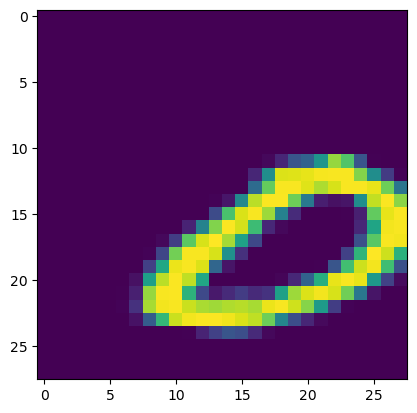

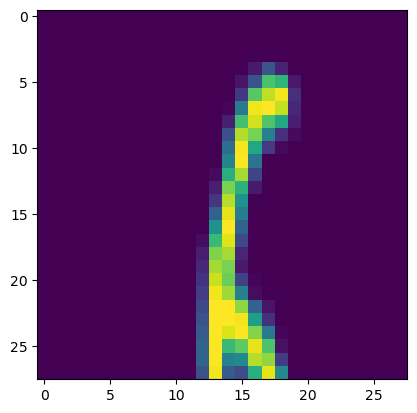

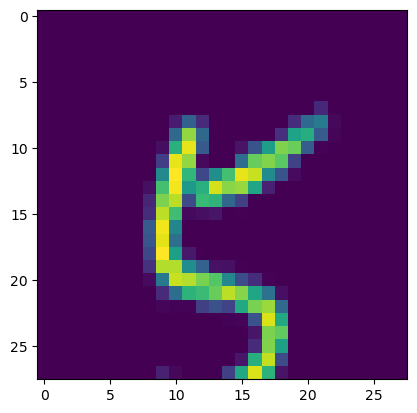

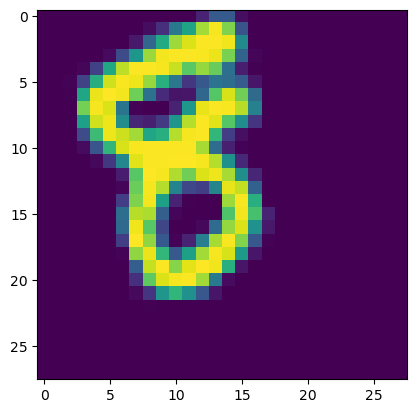

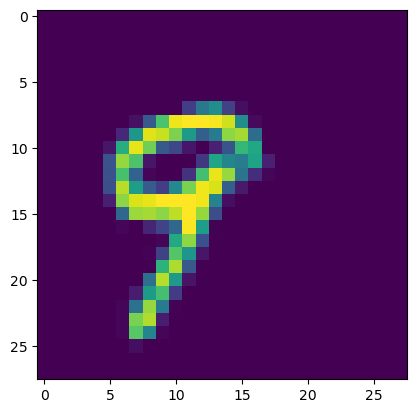

In [9]:
# Un ejemplo que genera 5 imágenes y las visualizamos

it = datagen.flow(x_train, y_train, batch_size=5)
batch_images, batch_labels = next(it)

for i in range(5):
  plt.imshow(batch_images[i])
  plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)                1

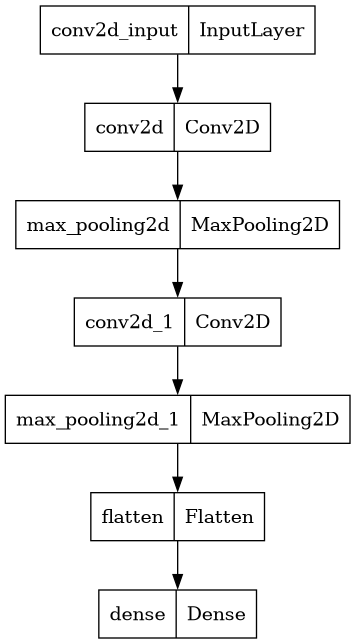

In [10]:
# Un modelo convolucional de ejemplo

model = tf.keras.Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# summarize layers
print(model.summary())

# plot graph
plot_model(model)

In [11]:
# Ojo, las convolucionales pueden ser muy lentas entrenando
# Prueba a seleccionar solo un conjunto de las imagenes y entrenar la red con ellas

history = model.fit(
              datagen.flow(x_train, y_train, batch_size=32),
              epochs=1,
              verbose=1)                # para que no ocupe toda la pantalla


1875/1875 [==============================] - 33s 17ms/step - loss: 0.7827 - accuracy: 0.7528


In [12]:
# Evaluacion

test_loss, test_acc = model.evaluate(x_train, y_train)
print('Test accuracy:', test_acc)

2024-03-12 01:13:46.299867: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 9s 5ms/step - loss: 0.1563 - accuracy: 0.9572
Test accuracy: 0.9572333097457886


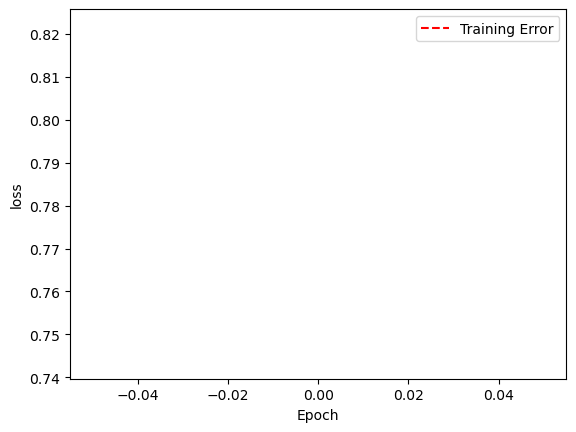

In [13]:
plot_history(history)

# Tarea

Prueba a integrar la estrategia de data augmentation con una red preentrenada.

Prueba a crear redes convolucionales que procesen las imágenes en paralelo.

Prueba a aplicar la red al conjunto de datos de CIFAR10 incluida en Keras